<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tools" data-toc-modified-id="Tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#Select-your-motif" data-toc-modified-id="Select-your-motif-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Select your motif</a></span></li><li><span><a href="#Check-the-motif's-point-symmetry" data-toc-modified-id="Check-the-motif's-point-symmetry-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check the motif's point symmetry</a></span></li><li><span><a href="#Select-the-global-pattern-symmetry" data-toc-modified-id="Select-the-global-pattern-symmetry-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Select the global pattern symmetry</a></span></li></ul></div>

In [1]:
import json, os
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Tools

In [2]:
library = '../motif_library/'
motif_coords = None
motif_types = None
motif_point_symmetry = None
induced = 'c1'

motif_selector = widgets.Dropdown(
    options=[f for f in os.listdir(library) if f.endswith('.json')],
    description='Motif',
    disabled=False,
    value=None
)

def on_motif_change(v):
    global motif_coords
    global motif_types
    global motif_symmetry
    info = json.load(open(library+v['new'], 'r'))
    motif_coords = info['coords'] 
    motif_types = info['types'] 
    motif_point_symmetry = info['symmetry'] 

motif_selector.observe(on_motif_change, names='value')

induced_selector = widgets.ToggleButtons(
    options=['Ignore (c1)', 'Use motif'],
    description=r'$S(\mathcal{P}|M):$',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Do not extend any of motif\'s symmetry to the tiling', 'Use some of motif\'s symmetry in tiling'],
#     icons=['check'] * 3
)

def on_induced_change(v):
    global induced
    if v['new'] == "Use motif":
        induced = motif_point_symmetry
    else:
        induced = 'c1'

induced_selector.observe(on_induced_change, names='value')

def plot(coords):
    coords = np.array(coords)
    plt.plot(coords[:,0], coords[:,1], 'o')
    plt.gca().axis('equal')

# Select your motif

In [3]:
display(motif_selector)

Dropdown(description='Motif', options=('d_1_vitruvian.json', 'c_1_random.json', 'd_inf_circle.json', 'd_6_hexa…

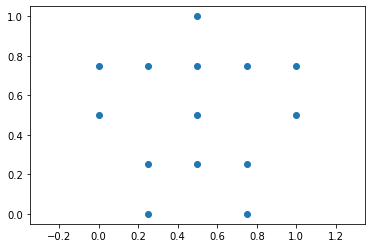

In [5]:
plot(motif_coords)

# Check the motif's point symmetry

You must have [pymatgen](https://pymatgen.org/index.html) installed for this to work, otherwise you can consider doing this manually and can skip ahead.

In [32]:
motif_point_symmetry = 'd_inf'

# Select the global pattern symmetry

In [31]:
# display(induced_selector)

In [33]:
import table
safe, dangerous, forbidden = table.prioritize(motif_point_symmetry)     

In [34]:
safe.style.hide_index()

Pattern Type,Symmetry Group $S(\mathcal{P})$,"Induced Group, $S(\mathcal{P}|M)$",Motif Transitive Proper Subgroups of $S(\mathcal{P})$,Minimal Forbidden Supergroups,Isohedral Tiling Type IH


In [35]:
dangerous.style.hide_index()

Pattern Type,Symmetry Group $S(\mathcal{P})$,"Induced Group, $S(\mathcal{P}|M)$",Motif Transitive Proper Subgroups of $S(\mathcal{P})$,Minimal Forbidden Supergroups,Isohedral Tiling Type IH
PP7,p2,c1,['Primitive'],,"[4, 23, 46, 47, 84]"
PP8,p2,c2,"['p1', '*']",,"[8, 57]"
PP9,pgg,c1,['Primitive'],,"[5, 6, 25, 27, 51, 52, 53, 86]"
PP11,pmg,c1,['Primitive'],,"[24, 49, 50, 85]"
PP13,pmg,d1,"['pg', 'p2', 'pgg']",,"[13, 15, 66, 69]"
PP14,pmm,c1,['Primitive'],,[48]
PP15,pmm,d1,"['pm', 'p2', 'pmg(2)', 'cmm', '*']",,[65]
PP16,pmm,d2,"['p1', 'pg', 'pm(2)', 'cm', 'p2(3)', 'pgg', 'pmg(2)', 'cmm(3)', '*(2)']",,[72]
PP17,cmm,c1,['Primitive'],,"[54, 78]"
PP19,cmm,d1,"['cm', 'p2', 'pgg', 'pmg']",,"[26, 67, 91]"


In [36]:
forbidden.style.hide_index()

Pattern Type,Symmetry Group $S(\mathcal{P})$,"Induced Group, $S(\mathcal{P}|M)$",Motif Transitive Proper Subgroups of $S(\mathcal{P})$,Minimal Forbidden Supergroups,Isohedral Tiling Type IH
PP1,p1,c1,['Primitive'],c2,"[1, 41]"
PP2,pg,c1,['Primitive'],d_inf,"[2, 3, 43, 44]"
PP3,pm,c1,['Primitive'],d_inf,[42]
PP4,pm,d1,"['p1', 'pg', 'cm', '*']",d2,[64]
PP5,cm,c1,['Primitive'],d_inf,"[22, 45, 83]"
PP6,cm,d1,"['p1', 'pg']",d2,"[12, 14, 68]"
PP10,pgg,c2,['pg'],d_inf,"[9, 59]"
PP12,pmg,c2,"['pg', 'pm', 'pgg', '*']",d_inf,[58]
PP18,cmm,c2,"['cm', 'pgg', 'pmm']",d_inf,[60]
PP22,p3,c3,"['p1', '*']",c6,[10]


In [ ]:
# Dangerous choices can be inspected further for possible problems (i.e. other groups that could be induced)